In [1]:
import numpy as np
from numpy.random import uniform, normal, poisson
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/Users/yuho/anaconda/envs/tf/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


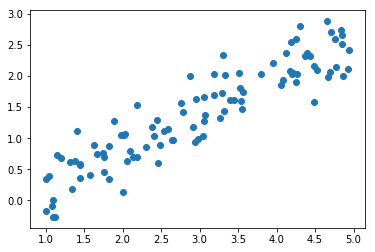

In [11]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1, 5, size=n_sample)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)

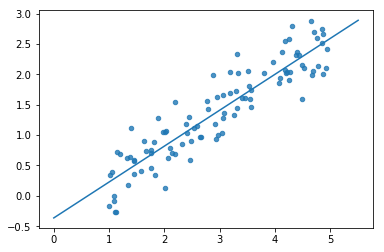

In [12]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals)

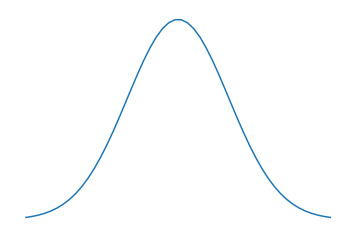

In [21]:
xx = np.linspace(-3,3)

fig, ax = plt.subplots()
ax.plot(xx, stats.norm.pdf(xx))

ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
ax.tick_params(labelleft="off",left="off") # y軸の削除
ax.set_xticklabels([]) 
plt.box("off")

plt.savefig("normal_dist.png", transparent=True)

In [2]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4

x = uniform(1, 5, size=n_sample)
mu = np.exp(a * x + b)
y = poisson(mu)

In [6]:
y

array([ 2, 11,  7,  5,  3,  4,  8,  6,  3,  0,  1, 13,  3,  2,  6,  1,  7,
        4,  3,  1,  3,  2,  5,  3,  4,  0,  1,  8,  8,  4,  1,  3,  5,  7,
        3,  7,  2,  3,  4, 11,  3,  3, 10, 12,  1,  1, 13,  1,  9,  9, 12,
        3,  1,  2,  3,  1, 13,  4, 16,  4, 10,  6, 18, 11, 11,  0,  2,  0,
        4,  5,  3,  0,  4,  1,  4,  3,  5,  2,  7, 11,  6,  3, 14,  4,  2,
        4,  3, 15,  2,  0,  9,  0,  4,  9,  2,  4, 11,  1,  4,  7])

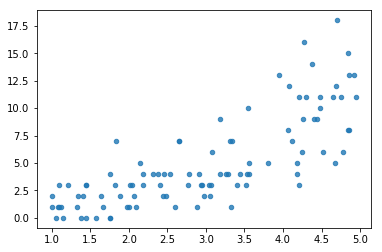

In [3]:
plt.scatter(x, y, s=20, alpha=0.8)

<Container object of 20 artists>

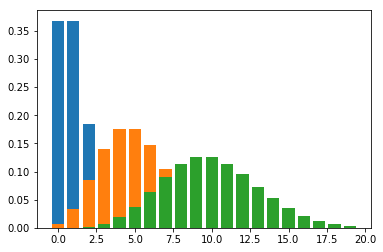

In [4]:
xx = np.arange(20)
yy = stats.poisson.pmf(xx, 1)

plt.bar(xx, yy)

xx = np.arange(20)
yy = stats.poisson.pmf(xx, 5)

plt.bar(xx, yy)


xx = np.arange(20)
yy = stats.poisson.pmf(xx, 10)

plt.bar(xx, yy)

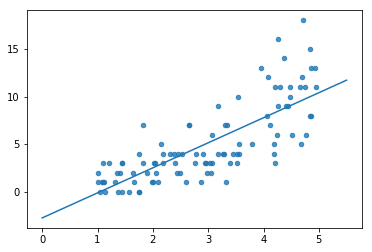

In [5]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([0, 5.5])
yvals = slope * xvals + intercept

plt.scatter(x, y, s=20, alpha=0.8)
plt.plot(xvals, yvals)

In [255]:
exog = sm.add_constant(x)
endog = y

In [256]:
mod = sm.GLM(endog, exog, family=sm.families.Poisson())
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -213.95
Date:                Sun, 18 Aug 2019   Deviance:                       120.86
Time:                        16:04:06   Pearson chi2:                     115.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2789      0.162     -1.720      0.085      -0.597       0.039
x1             0.5646      0.042     13.508      0.000       0.483       0.647
==============================================================================
"""

In [76]:
mod = sm.OLS(endog, exog)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           6.90e-17
Time:                        14:32:41   Log-Likelihood:                -147.33
No. Observations:                  50   AIC:                             298.7
Df Residuals:                      48   BIC:                             302.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9193      1.215     -2.402      0.020      -5.363      -0.476
x1             9.1792      0.726     12.642      0.000       7.719      10.639
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.527
Skew:                           0.425   Prob(JB):                        0.466
Kurtosis:                       3.108   Cond. No.                         3.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""